# Read Data 
Irrelevant or partially relevant features can negatively impact model performance.

In [17]:
import pandas as pd 
import scipy as sp
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
df = read_csv('./UGRdata/parsed/selected_1000_blacklist_100.csv')
#print(df)
array = df.values


# Descriptive statistics
df.describe()



,FlowDuration,SrcPort,DstPort,ForwardingStatus,TypeofService,PacketExed,Bytes
count,1.200015e+06,1.200015e+06,1.200015e+06,1200015.0,1.200015e+06,1.200015e+06,1.200015e+06
mean,3.482180e+00,2.625708e+04,1.804260e+04,0.0,1.826363e+01,2.116811e+01,1.243521e+04
std,2.147261e+01,2.434885e+04,2.374401e+04,0.0,2.759625e+01,1.317374e+03,1.786913e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00,2.600000e+01
25%,0.000000e+00,8.000000e+01,8.000000e+01,0.0,0.000000e+00,1.000000e+00,8.100000e+01
50%,1.240000e-01,2.671700e+04,4.430000e+02,0.0,0.000000e+00,3.000000e+00,2.300000e+02
75%,1.332000e+00,5.047500e+04,4.342750e+04,0.0,4.000000e+01,8.000000e+00,1.055000e+03
max,3.129480e+02,6.553500e+04,6.553500e+04,0.0,2.240000e+02,1.003449e+06,1.483723e+09


In [20]:
# Analyse missing data
# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

draw_missing_data_table(df)


,Total,Percent
Label,0,0.0
TrafficType,0,0.0
Bytes,0,0.0
PacketExed,0,0.0
TypeofService,0,0.0
ForwardingStatus,0,0.0
Flag,0,0.0
Protocol,0,0.0
DstPort,0,0.0
SrcPort,0,0.0


In [18]:
# Data types
df.dtypes


DateTime             object
FlowDuration        float64
SrcIP                object
DstIP                object
SrcPort               int64
DstPort               int64
Protocol             object
Flag                 object
ForwardingStatus      int64
TypeofService         int64
PacketExed            int64
Bytes                 int64
TrafficType          object
Label                object
dtype: object

In [ ]:
# Transform categorical variables into dummy variables
df = pd.get_dummies(df, drop_first=True)  # To avoid dummy trap
df.head()

In [8]:

# separate array into input and output components
X = array[:,1:11]
Y = array[:,0]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
#print(rescaledX[0:5,:])
print(rescaledX)


[[0.453 0.    0.428 ... 0.    0.    0.   ]
 [0.453 0.    0.497 ... 0.    0.    0.   ]
 [0.453 0.    0.497 ... 0.    0.    0.   ]
 ...
 [0.801 0.049 0.026 ... 0.    0.    0.037]
 [0.801 0.048 0.026 ... 0.    0.    0.036]
 [0.806 0.052 0.026 ... 0.    0.    0.035]]


Reference: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

# 1. Univariate Selection

We use the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the dataset.

In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from pandas import read_csv

df = read_csv('./UGRdata/parsed/selected_1000_blacklist_100_parsed.csv')

X = df.iloc[:,1:11]
Y = df.iloc[:,0]
#print(X)
#print(Y)
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
#print(fit.scores_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

[3.28837782e+08 6.21797866e+04 4.03790565e+12 4.44266035e+06
 3.65356808e+08 4.06855561e+08 6.87518381e+00            nan
 8.25602889e+05 1.19432556e+06]
           Specs         Score
2          SrcIP  4.037906e+12
5        DstPort  4.068556e+08
4        SrcPort  3.653568e+08
0      Timestamp  3.288378e+08
3          DstIP  4.442660e+06
9     PacketExed  1.194326e+06
8  TypeofService  8.256029e+05
1   FlowDuration  6.217979e+04
6       Protocol  6.875184e+00


# 2. Feature Importance

[0.81854359 0.00640401 0.03541541 0.05326204 0.0214593  0.02571382
 0.00891501 0.         0.02251537 0.00777143]


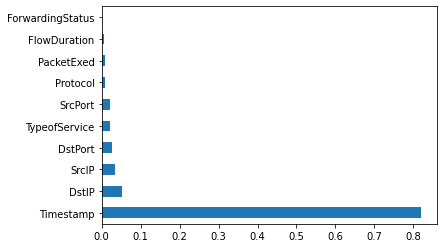

In [11]:
import pandas as pd
import numpy as np
data = pd.read_csv("./UGRdata/parsed/selected_1000_blacklist_100_parsed.csv")
X = df.iloc[:,1:11]
Y = df.iloc[:,0]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# 3.Correlation Matrix with Heatmap


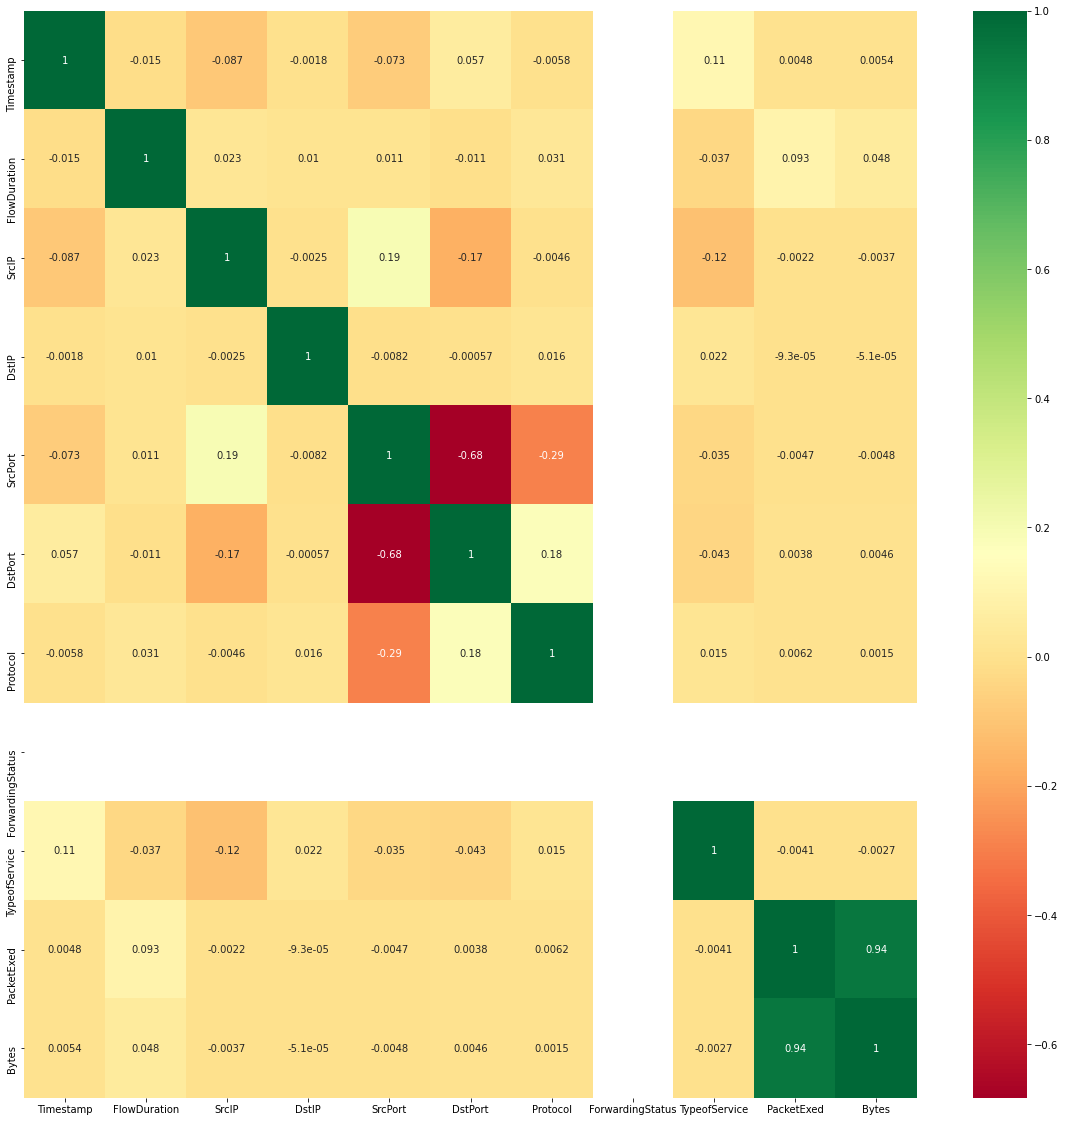

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("./UGRdata/parsed/selected_1000_blacklist_100_parsed.csv")
X = df.iloc[:,1:11]
Y = df.iloc[:,0]
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")